In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [188]:
df = pd.read_csv("/Users/ssgmcollege/Machine_learning_codes/uber.csv")

In [189]:
print(f"No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}\nTotal No. of Cells : {df.size}")

No. of Rows : 200000
No. of Columns : 9
Total No. of Cells : 1800000


In [190]:
df.dropna(inplace=True)

In [191]:
df.drop(df[df['fare_amount'] < 0].index, inplace=True)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                (df.dropoff_longitude > 180) |(df.dropoff_longitude < -180)
                                ]

In [192]:
display(df.dtypes)

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

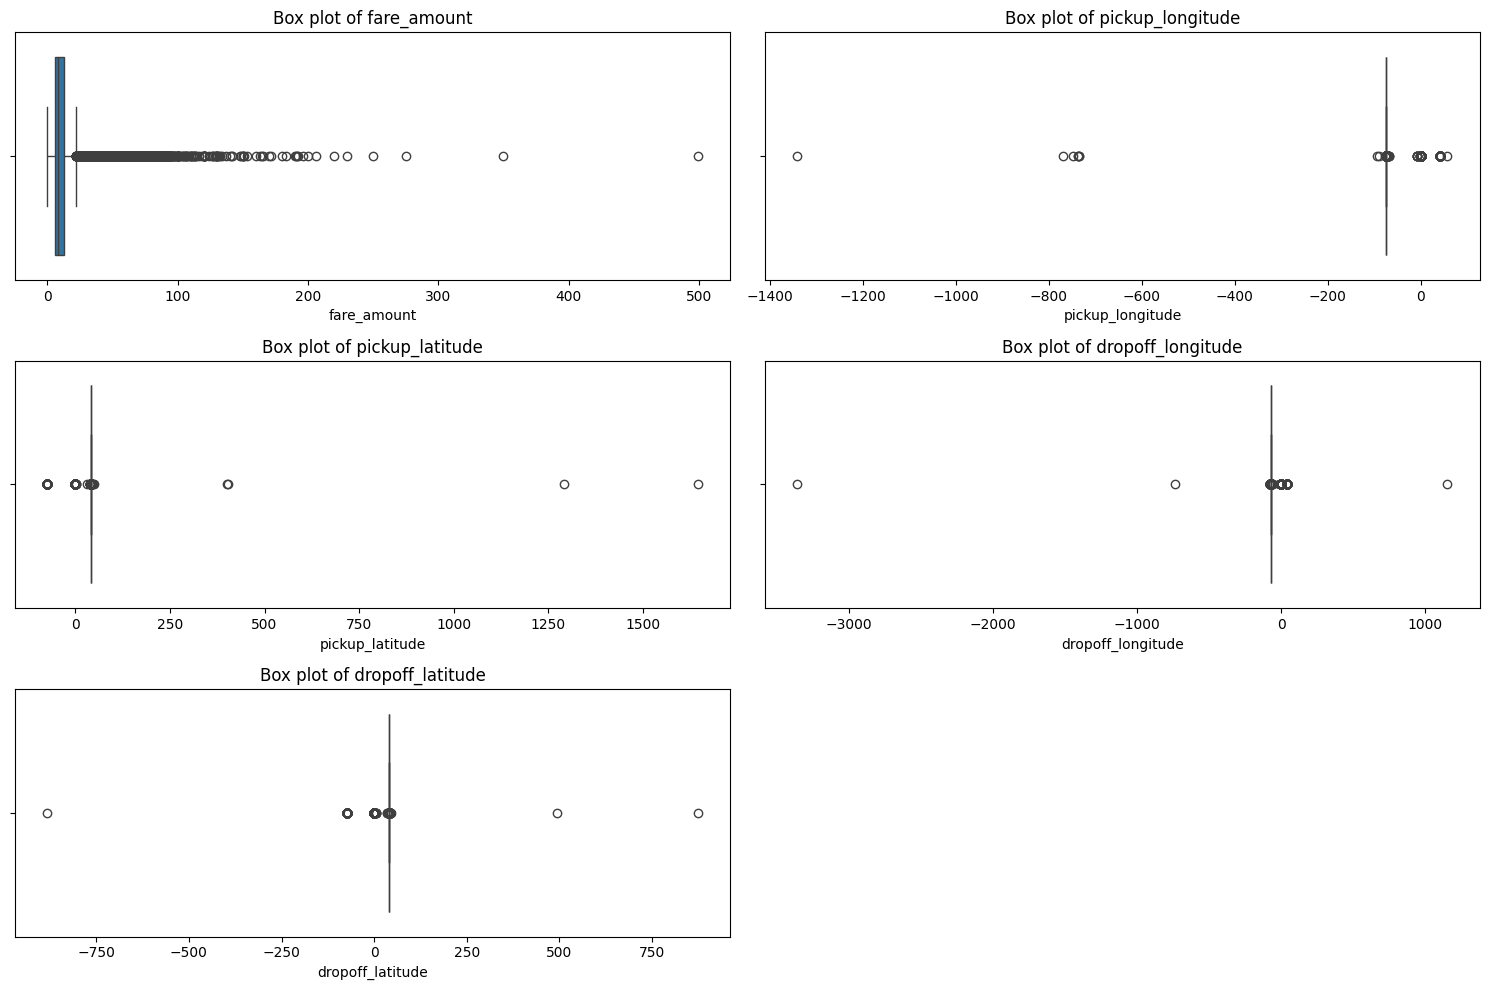

In [193]:
columns_to_plot = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [194]:
columns_to_clean = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

for col in columns_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)
    print(f"Number of rows after removing outliers in {col}: {len(df)}")

Number of rows after removing outliers in fare_amount: 182827
Number of rows after removing outliers in pickup_longitude: 175826
Number of rows after removing outliers in pickup_latitude: 173242
Number of rows after removing outliers in dropoff_longitude: 170415
Number of rows after removing outliers in dropoff_latitude: 166868


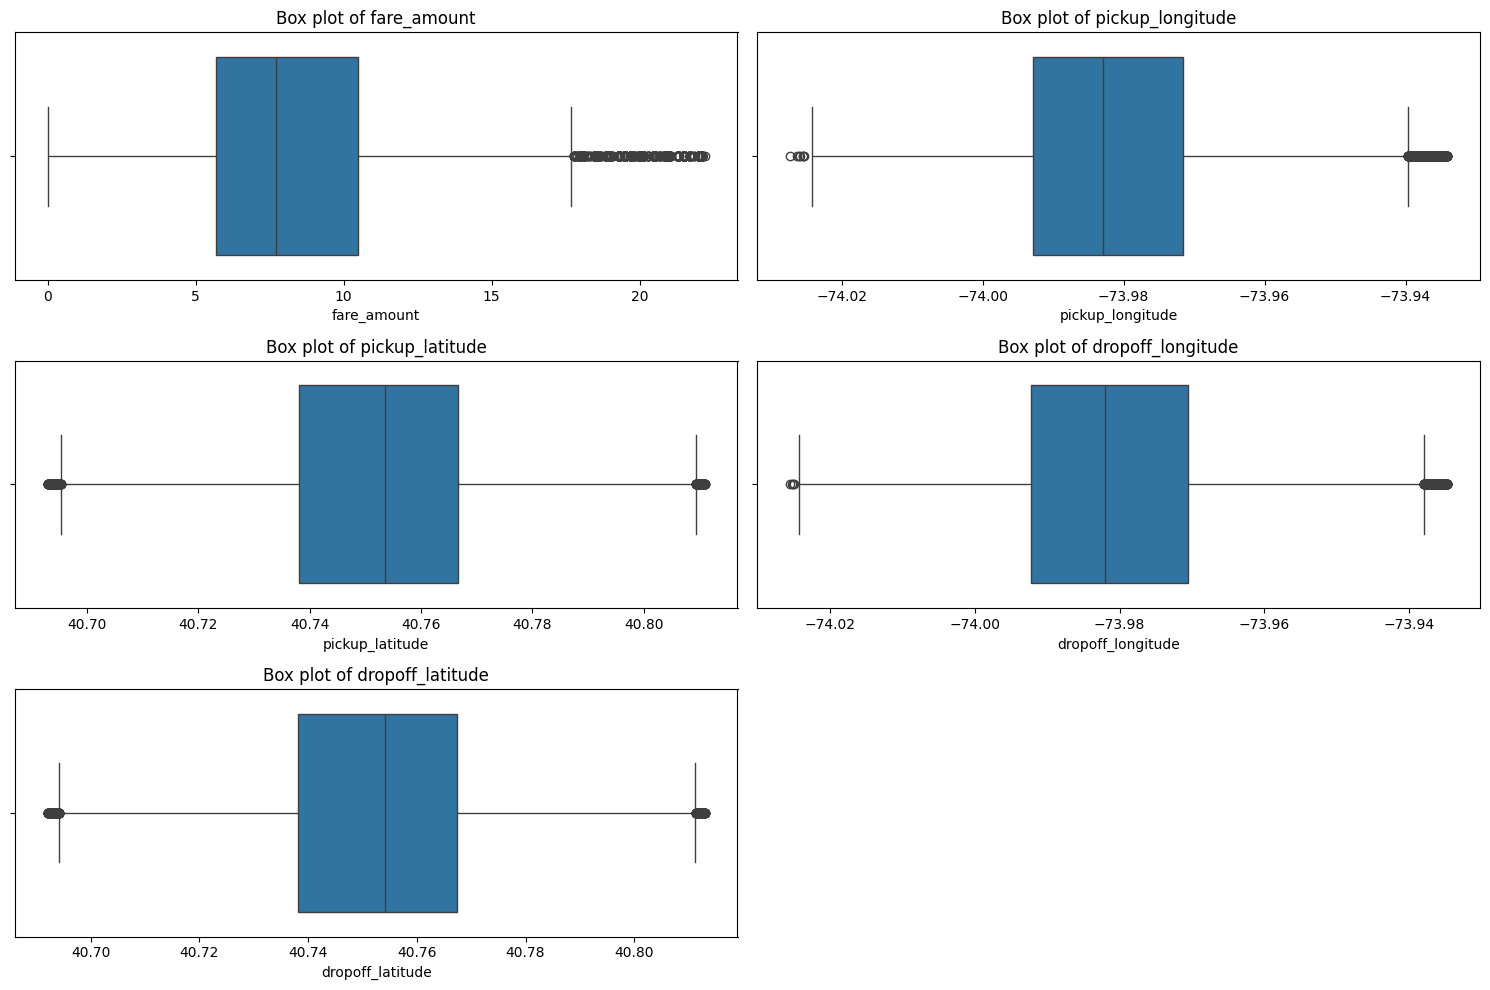

In [195]:
columns_to_plot = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [196]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['distance_km'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [197]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

df.drop('pickup_datetime', axis=1, inplace=True)

In [198]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('key', axis=1, inplace=True)

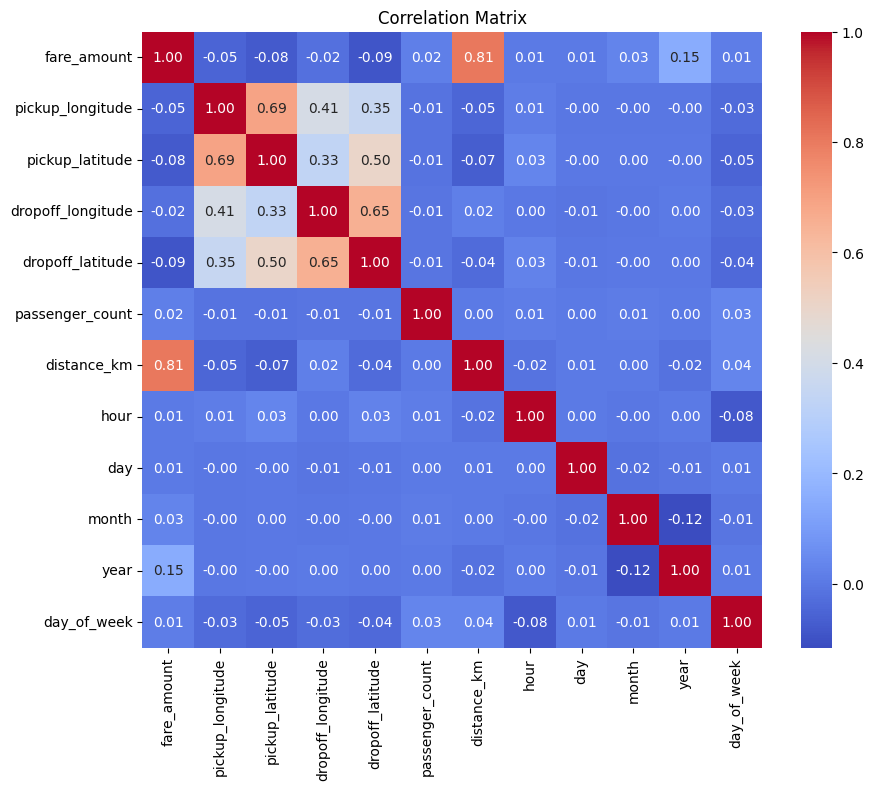

In [199]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [204]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

## linear Regression

In [205]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## Random Forest

In [206]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation

In [207]:
results = {
    "Linear Regression": {
        "R-squared": r2_score(y_test, y_pred_lr),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        "MAE": mean_absolute_error(y_test, y_pred_lr)
    },
    "Random Forest": {
        "R-squared": r2_score(y_test, y_pred_rf),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        "MAE": mean_absolute_error(y_test, y_pred_rf)
    }
}

results_df = pd.DataFrame(results).T
results_df = results_df[["R-squared", "RMSE", "MAE"]]
results_df = results_df.round(4)

print("\n--- Comprehensive Model Comparison ---")
print(results_df)


--- Comprehensive Model Comparison ---
                   R-squared    RMSE     MAE
Linear Regression     0.6851  2.1877  1.5547
Random Forest         0.7638  1.8947  1.3077
